In [142]:
import urllib.request
import json
import gzip
import shutil
import re
from collections import Counter
import matplotlib.pylab as plt
import numpy as np
import networkx as nx
from fa2 import ForceAtlas2
import community

In [2]:
#query = "https://api.stackexchange.com//2.2/questions?pagesize=100&fromdate=1543881600&todate=1572998400&order=desc&sort=votes&site=stackoverflow&filter=!9Z(-wwK0y"

In [3]:
#response = urllib.request.urlopen(query)
#gzipFile = gzip.GzipFile(fileobj=response)
#src = gzipFile.read()
#src = response.read()
#stackjson = json.loads(src)
#string = json.dumps(stackjson)
#stackjson

In [4]:
#i = 0
#for question in stackjson['items']:
#    print(question['tags'])
#    print(i)
#    i+=1

In [5]:
#list of jsons
jsons = []

allTags = []

# variables
oneYear=86400*365
halfMonth=int((oneYear/12)/2)
todate=1572998400
fromdate=todate-halfmonth
# 10 years back
yearList = []
for i in range(1,11):
    print("i",i)
    year = []
    for ii in range (1,13):
        print("ii", ii)
        for iii in range (1,3):
            print("todate",todate,"fromdate",fromdate)
            query = "https://api.stackexchange.com//2.2/questions?pagesize=100&fromdate={}&todate={}&order=desc&sort=votes&site=stackoverflow&filter=!9Z(-wwK0y".format(fromdate,todate)
            response = urllib.request.urlopen(query)
            gzipFile = gzip.GzipFile(fileobj=response)
            src = gzipFile.read()
            stackjson = json.loads(src)
            jsons.append(stackjson)
            for question in stackjson['items']:
                taglist = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in question['tags']]
                allTags.extend(list(dict.fromkeys(taglist)))
                year.extend(list(dict.fromkeys(taglist)))
            todate-=halfmonth
            fromdate-=halfmonth
    yearList.append(year)

i 1
ii 1
todate 1572998400 fromdate 1570370400
ii 2
todate 1570370400 fromdate 1567742400
ii 3
todate 1567742400 fromdate 1565114400
ii 4
todate 1565114400 fromdate 1562486400
ii 5
todate 1562486400 fromdate 1559858400
ii 6
todate 1559858400 fromdate 1557230400
ii 7
todate 1557230400 fromdate 1554602400
ii 8
todate 1554602400 fromdate 1551974400
ii 9
todate 1551974400 fromdate 1549346400
ii 10
todate 1549346400 fromdate 1546718400
ii 11
todate 1546718400 fromdate 1544090400
ii 12
todate 1544090400 fromdate 1541462400
i 2
ii 1
todate 1541462400 fromdate 1538834400
ii 2
todate 1538834400 fromdate 1536206400
ii 3
todate 1536206400 fromdate 1533578400
ii 4
todate 1533578400 fromdate 1530950400
ii 5
todate 1530950400 fromdate 1528322400
ii 6
todate 1528322400 fromdate 1525694400
ii 7
todate 1525694400 fromdate 1523066400
ii 8
todate 1523066400 fromdate 1520438400
ii 9
todate 1520438400 fromdate 1517810400
ii 10
todate 1517810400 fromdate 1515182400
ii 11
todate 1515182400 fromdate 151255440

In [6]:
#Tags per year
tags2019 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[0]] 
tags2018 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[1]] 
tags2017 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[2]] 
tags2016 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[3]] 
tags2015 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[4]] 
tags2014 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[5]] 
tags2013 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[6]] 
tags2012 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[7]] 
tags2011 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[8]] 
tags2010 = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in yearList[9]] 

#Dict pr. year
tags2019dict = Counter(tags2019)
tags2018dict = Counter(tags2018)
tags2017dict = Counter(tags2017)
tags2016dict = Counter(tags2016)
tags2015dict = Counter(tags2015)
tags2014dict = Counter(tags2014)
tags2013dict = Counter(tags2013)
tags2012dict = Counter(tags2012)
tags2011dict = Counter(tags2011)
tags2010dict = Counter(tags2010)


In [7]:
allTags = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in allTags]
tagDict = Counter(allTags)
#tagDictOrd = OrderedDict(sorted(d.items(), key=lambda t: t[1]))
#allTags
#print(tagDict)

PLOT HER

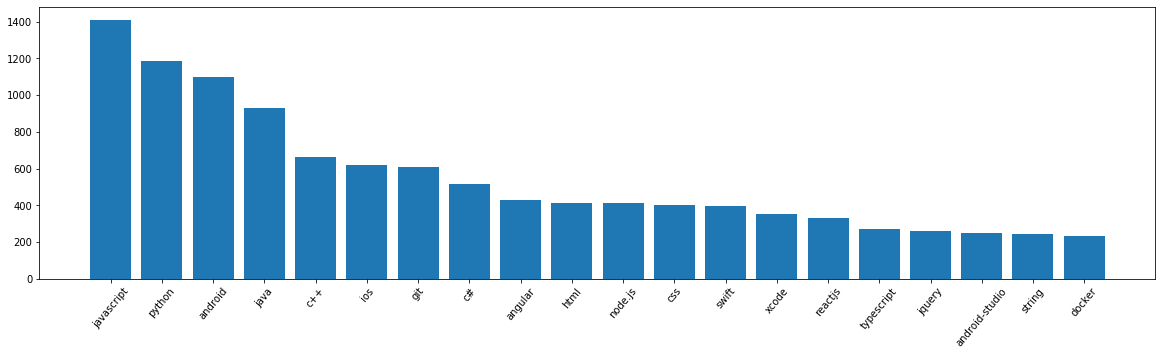

In [8]:
sorted_x = sorted(tagDict.items(), key=lambda kv: kv[1], reverse=True)
n_items = sorted_x[0:20]
x, y = zip(*n_items) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,5))
plt.bar(x, y)
plt.xticks(rotation=50)
plt.show()

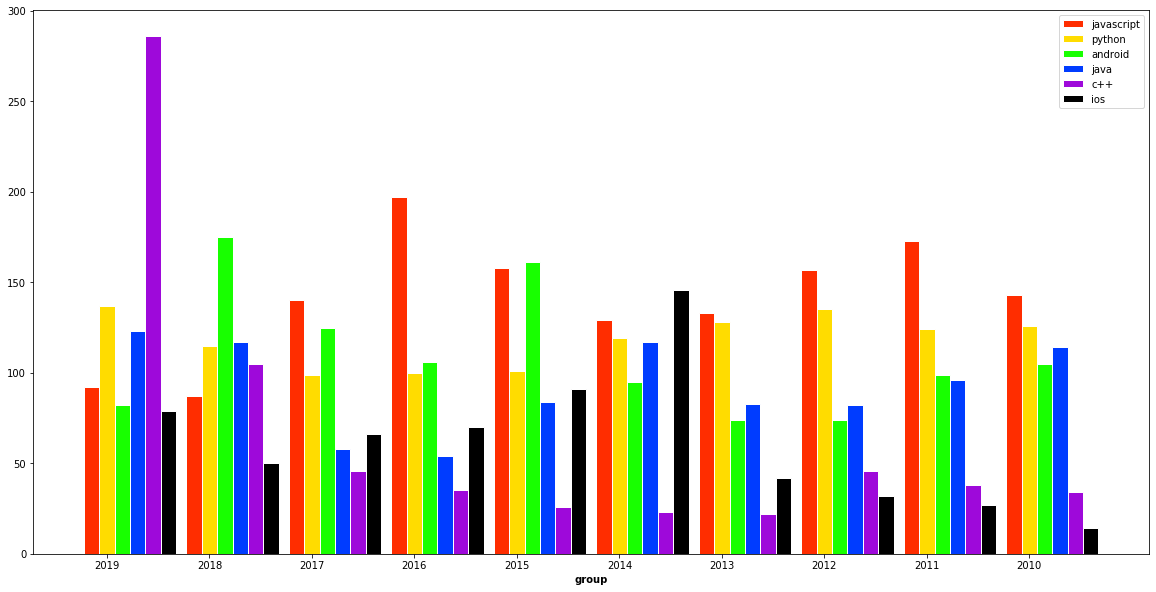

In [9]:
plt.figure(figsize=(20,10))

# set width of bar
barWidth = 0.15

# x-values
barsWord1 = [tags2019dict[x[0]], tags2018dict[x[0]], tags2017dict[x[0]], tags2016dict[x[0]], tags2015dict[x[0]], tags2014dict[x[0]], tags2013dict[x[0]], tags2012dict[x[0]], tags2011dict[x[0]],tags2010dict[x[0]]]
barsWord2 = [tags2019dict[x[1]], tags2018dict[x[1]], tags2017dict[x[1]], tags2016dict[x[1]], tags2015dict[x[1]], tags2014dict[x[1]], tags2013dict[x[1]], tags2012dict[x[1]], tags2011dict[x[1]],tags2010dict[x[1]]]
barsWord3 = [tags2019dict[x[2]], tags2018dict[x[2]], tags2017dict[x[2]], tags2016dict[x[2]], tags2015dict[x[2]], tags2014dict[x[2]], tags2013dict[x[2]], tags2012dict[x[2]], tags2011dict[x[2]],tags2010dict[x[2]]]
barsWord4 = [tags2019dict[x[3]], tags2018dict[x[3]], tags2017dict[x[3]], tags2016dict[x[3]], tags2015dict[x[3]], tags2014dict[x[3]], tags2013dict[x[3]], tags2012dict[x[3]], tags2011dict[x[3]],tags2010dict[x[3]]]
barsWord5 = [tags2019dict[x[4]], tags2018dict[x[4]], tags2017dict[x[4]], tags2016dict[x[4]], tags2015dict[x[4]], tags2014dict[x[4]], tags2013dict[x[4]], tags2012dict[x[4]], tags2011dict[x[4]],tags2010dict[x[4]]]
barsWord6 = [tags2019dict[x[5]], tags2018dict[x[5]], tags2017dict[x[5]], tags2016dict[x[5]], tags2015dict[x[5]], tags2014dict[x[5]], tags2013dict[x[5]], tags2012dict[x[5]], tags2011dict[x[5]],tags2010dict[x[5]]]


# Set position of bar on X axis
r1 = np.arange(len(barsWord1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

 
# Make the plot
plt.bar(r1, barsWord1, color='#FF2D00', width=barWidth, edgecolor='white', label=x[0])
plt.bar(r2, barsWord2, color='#FFDC00', width=barWidth, edgecolor='white', label=x[1])
plt.bar(r3, barsWord3, color='#18FF00', width=barWidth, edgecolor='white', label=x[2])
plt.bar(r4, barsWord4, color='#003CFF', width=barWidth, edgecolor='white', label=x[3])
plt.bar(r5, barsWord5, color='#9E09DA', width=barWidth, edgecolor='white', label=x[4])
plt.bar(r6, barsWord6, color='#000000', width=barWidth, edgecolor='white', label=x[5])

 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(barsWord1))], ['2019','2018','2017','2016','2015','2014','2013','2012','2011','2010'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

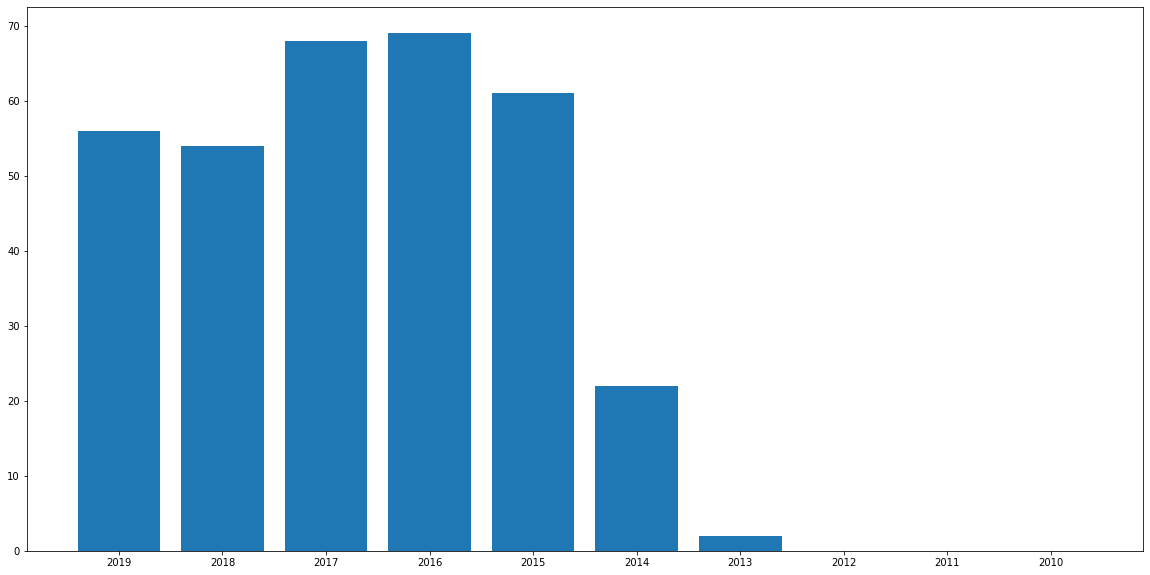

In [10]:
barsreact = [tags2019dict['reactjs'], tags2018dict['reactjs'], tags2017dict['reactjs'], tags2016dict['reactjs'], tags2015dict['reactjs'], tags2014dict['reactjs'], tags2013dict['reactjs'], tags2012dict['reactjs'], tags2011dict['reactjs'],tags2010dict['reactjs']]

plt.figure(figsize=(20,10))
plt.bar(['2019','2018','2017','2016','2015','2014','2013','2012','2011','2010'],barsreact)
plt.show()

In [11]:
network = nx.Graph()
network.add_nodes_from(list(dict.fromkeys(allTags)))
for json in jsons:
    for question in json['items']:
        taglisthelper = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in question['tags']]
        for tag in taglisthelper:
            for tag2 in taglisthelper:
                network.add_edge(tag,tag2)

C:\Users\mads_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


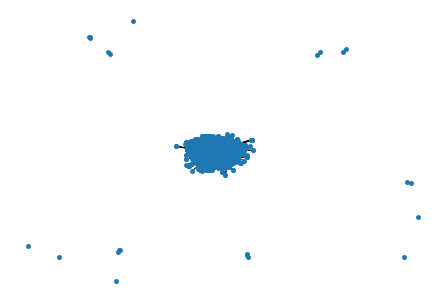

In [12]:
nx.draw(network, node_size=15)

In [13]:
len(list(network.nodes))

4689

In [14]:
print(len(allTags))
print(len(network.edges))

35883
27615


In [55]:
multiTagDict = {}
for tag in tagDict:
    if tagDict[tag] > 6:
        multiTagDict[tag] = tagDict[tag]
        #bprint("tagdict[tag]", tagDict[tag])
        #print("multiTagDict[tag]",multiTagDict[tag])

In [56]:
len(multiTagDict)

754

In [57]:
networkSmall = nx.Graph()
networkSmall.add_nodes_from(list(dict.fromkeys(multiTagDict)))
print(len(list(networkSmall.nodes)))

754


In [58]:
for json in jsons:
    for question in json['items']:
        taglisthelper = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in question['tags']]
        for tag in taglisthelper:
            if tag in multiTagDict:
                for tag2 in taglisthelper:
                    if tag2 in multiTagDict:
                        networkSmall.add_edge(tag,tag2)
print(len(networkSmall.edges))

9018


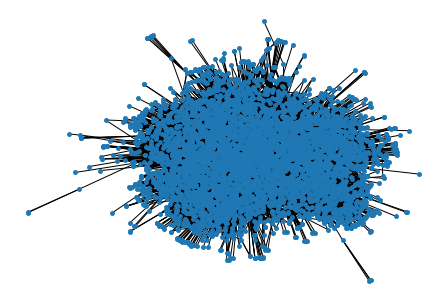

In [59]:
lcc = max(nx.connected_component_subgraphs(network),key=len)
nx.draw(lcc, node_size=15)

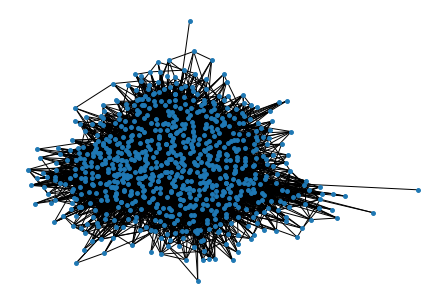

In [60]:
lccSmall = max(nx.connected_component_subgraphs(networkSmall),key=len)
nx.draw(lccSmall, node_size=15)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.05it/s]


BarnesHut Approximation  took  3.03  seconds
Repulsion forces  took  20.28  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.06  seconds
AdjustSpeedAndApplyForces step  took  0.23  seconds


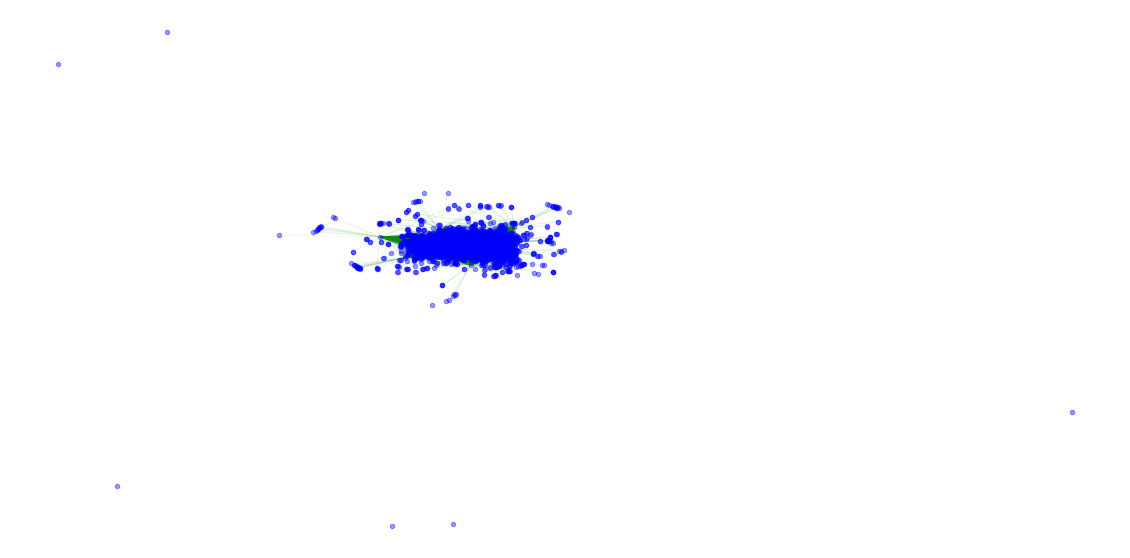

In [61]:
plt.figure(figsize=(20,10))

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=True,
                        gravity=10.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(network, pos=None, iterations=100)
nx.draw_networkx_nodes(network, positions, node_size=20, with_labels=False, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(network, positions, edge_color="green", alpha=0.05)
plt.axis('off')
plt.show()


In [62]:
def rescale(val, in_min, in_max, out_min, out_max):
    return out_min + (val - in_min) * ((out_max - out_min) / (in_max - in_min))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 87.86it/s]


BarnesHut Approximation  took  0.13  seconds
Repulsion forces  took  0.94  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


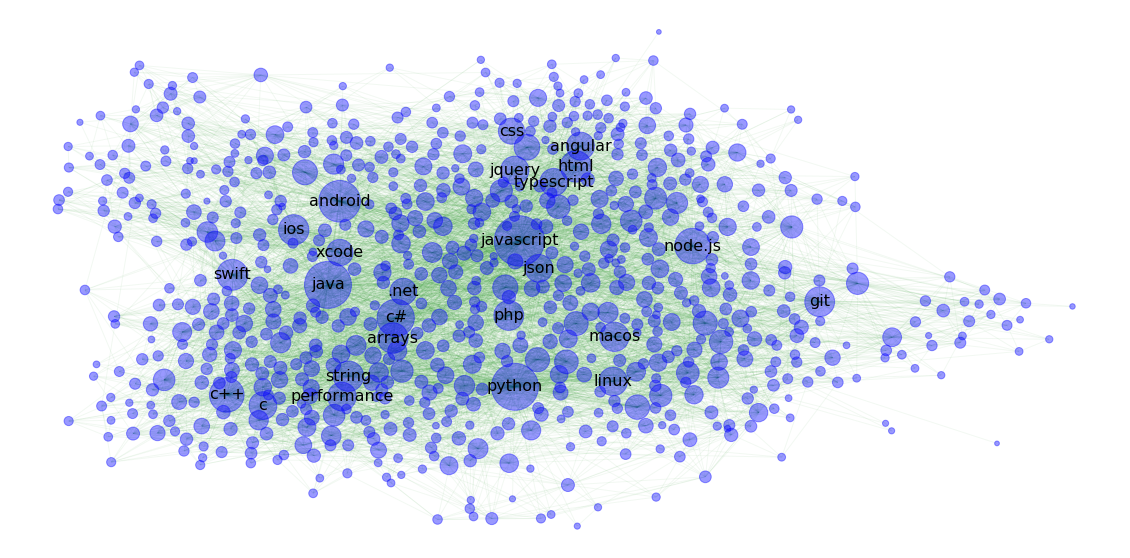

In [128]:
plt.figure(figsize=(20,10))

forceatlas2Small = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

degreeDict = dict(networkSmall.degree)

largestnodesSmall = dict(sorted(dict(networkSmall.degree()).items(), key=lambda item: item[1], reverse=True)[0:25])
nodelabelsSmall = {}
for key, value in largestnodesSmall.items():
    nodelabelsSmall[key] = key

positionsSmall = forceatlas2Small.forceatlas2_networkx_layout(networkSmall, pos=None, iterations=100)
nx.draw_networkx_nodes(networkSmall, positionsSmall, node_size=[rescale(v,2,650,15,5000) for v in degreeDict.values()], with_labels=False, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(networkSmall, positionsSmall, edge_color="green", alpha=0.05)
labels = nx.draw_networkx_labels(networkSmall, positionsSmall, labels=nodelabelsSmall, font_color='k', font_size=16, font_weight='normal')

plt.axis('off')
plt.show()


In [64]:
networkSmall.degree()

DegreeView({'ios': 120, 'swift': 124, 'xcode': 92, 'bash': 78, 'git': 116, 'macos': 112, 'macos-catalina': 19, 'c': 100, 'python': 288, 'linux': 107, 'assembly': 23, 'tensorflow': 22, 'keras': 11, 'objective-c': 55, 'c++': 156, 'unique-ptr': 13, 'abi': 16, 'android': 226, 'cordova': 22, 'ionic-framework': 16, 'ionic': 15, 'build.gradle': 21, 'list': 61, 'tuples': 19, 'ruby': 76, 'floating-point': 49, 'multithreading': 36, 'javascript': 330, 'google-chrome': 58, 'cookies': 24, 'visual-c++': 13, 'java': 287, 'c#': 181, '.net': 92, 'datetime': 32, '.net-core': 38, 'string': 120, 'while-loop': 18, 'jvm': 24, 'jit': 16, 'haskell': 24, 'functional-programming': 30, 'recursion': 18, 'mongodb': 42, 'gcc': 37, 'generics': 27, 'lambda': 47, 'type-inference': 12, 'visual-studio-code': 41, 'swiftui': 11, 'pointers': 29, 'undefined-behavior': 22, 'pip': 44, 'google-play': 12, 'google-play-console': 6, 'shell': 65, 'stdstring': 13, 'c++-standard-library': 11, 'performance': 107, 'language-lawyer': 6

In [65]:
for key, value in sorted(dict(networkSmall.degree()).items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, value))

javascript: 330
python: 288
java: 287
android: 226
c#: 181
node.js: 165
c++: 156
html: 128
swift: 124
arrays: 121
ios: 120
string: 120
git: 116
php: 116
macos: 112
linux: 107
performance: 107
jquery: 104
angular: 101
c: 100
json: 100
typescript: 99
xcode: 92
.net: 92
css: 89
reactjs: 86
visual-studio: 83
android-studio: 81
bash: 78
ruby: 76
windows: 76
file: 75
mysql: 73
angularjs: 72
ubuntu: 71
docker: 67
shell: 65
syntax: 65
ecmascript: 64
github: 64
npm: 64
http: 63
list: 61
language-lawyer: 61
rest: 61
google-chrome: 58
command-line: 58
objective-c: 55
sql: 54
ruby-on-rails: 53
function: 53
gradle: 53
pandas: 52
kotlin: 52
debugging: 51
types: 51
algorithm: 50
floating-point: 49
asp.net: 49
r: 48
if-statement: 48
lambda: 47
variables: 47
postgresql: 46
version-control: 46
numpy: 45
intellij-idea: 45
asynchronous: 45
security: 45
pip: 44
ajax: 44
unix: 44
mongodb: 42
dataframe: 42
react-native: 42
terminology: 42
asp.net-core: 42
optimization: 42
visual-studio-code: 41
dictionary: 4

resharper: 11
rx-java: 11
android-resources: 11
google-cloud-firestore: 11
grand-central-dispatch: 11
navbar: 11
autowired: 11
uiview: 11
uilabel: 11
server: 11
jackson: 11
responsive-design: 11
hex: 11
function-pointers: 10
selenium: 10
yarnpkg: 10
google-chrome-extension: 10
mongoose: 10
websocket: 10
android-room: 10
artificial-intelligence: 10
move-semantics: 10
background: 10
mocha: 10
angular-material: 10
facebook-graph-api: 10
json.net: 10
firebase-cloud-messaging: 10
final: 10
jsx: 10
pyspark: 10
imagemagick: 10
cpython: 10
javadoc: 10
vscode-settings: 10
android-toolbar: 10
android-design-library: 10
elasticsearch: 10
jasmine: 10
mysql-error: 10
android-oreo: 10
python-import: 10
notepad++: 10
razor: 10
angular-services: 10
bluebird: 10
html-input: 10
onclick: 10
ecmascript-harmony: 10
msysgit: 10
iis-express: 10
character-encoding: 10
git-remote: 10
perl: 9
constexpr: 9
avd: 9
image-processing: 9
vba: 9
entity-framework-core: 9
big-o: 9
css-transitions: 9
azure-devops: 9
.net

{'javascript': 330, 'python': 288, 'java': 287, 'android': 226, 'c#': 181, 'node.js': 165, 'c++': 156, 'html': 128, 'swift': 124, 'arrays': 121, 'ios': 120, 'string': 120}


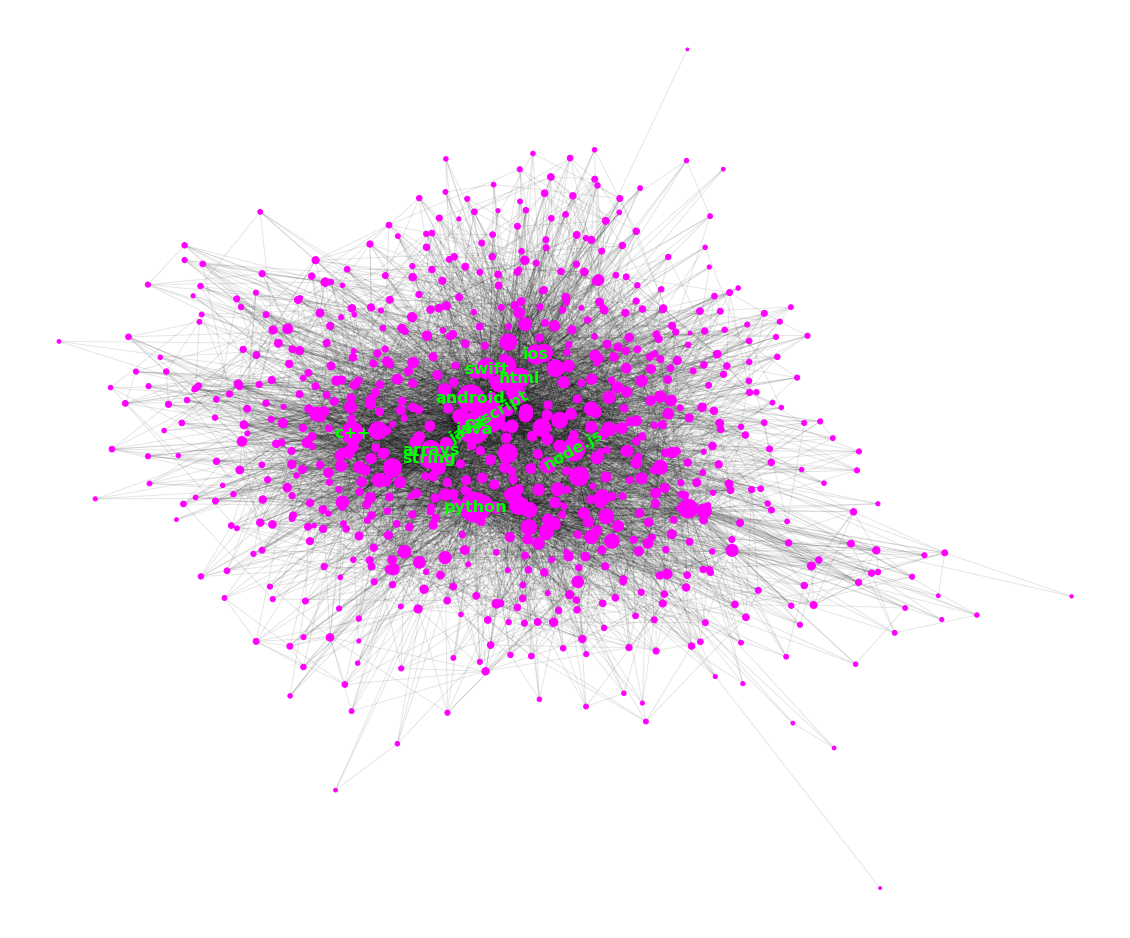

In [141]:
plt.figure(figsize=(20,17))
#edges = nx.draw_networkx_edges(networkSmall, pos=nx.draw(networkSmall))
#nx.draw(networkSmall, pos=nx.draw(networkSmall), node_size=[rescale(v,2,650,15,5000) for v in degreeDict.values()])

largestnodes = dict(sorted(dict(networkSmall.degree()).items(), key=lambda item: item[1], reverse=True)[0:12])
nodelabels = {}
for key, value in largestnodes.items():
    nodelabels[key] = key

print(largestnodes)

#Gcc = networkSmall.subgraph(sorted(nx.connected_components(networkSmall), key=len, reverse=True)[0])
pos = nx.spring_layout(networkSmall)
labels = nx.draw_networkx_labels(networkSmall, pos, labels=nodelabels, font_color='lime', font_size=16, font_weight='bold')
for k,t in labels.items():
    if (k == "node.js" or k == "javascript"):
        t.set_rotation(30)
plt.axis('off')
nx.draw_networkx_nodes(networkSmall, pos, node_color='magenta', node_size=[rescale(v,2,650,5,2000) for v in degreeDict.values()])
nx.draw_networkx_edges(networkSmall, pos, alpha=0.1)

plt.show()

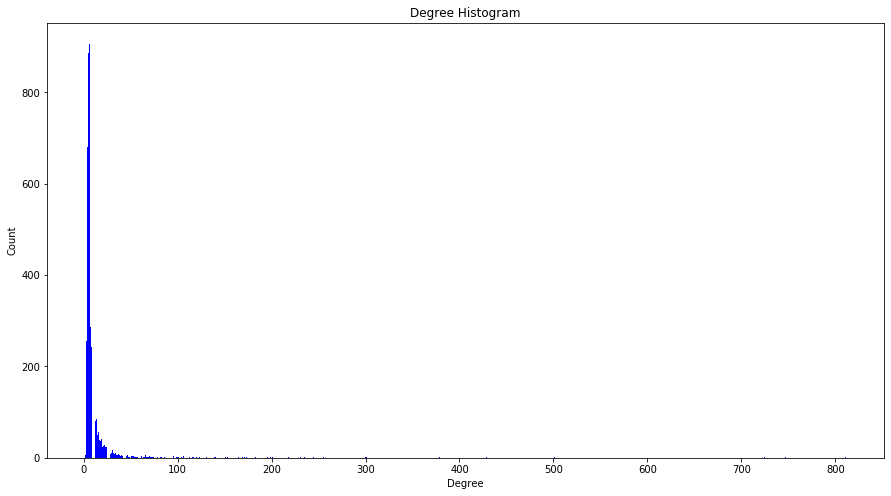

In [131]:
degree_sequence = sorted([d for n, d in network.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

#plt.figure(figsize=(20,10))
#ax = plt.subplot()
fig, ax = plt.subplots(figsize=(15,8))

plt.bar(deg, cnt, width=0.80, color='b')



plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()


In [137]:
above40count=0
totalcount=0
for k,v in degreeCount.items():
    #print(k)
    #print(v)
    totalcount+=v
    if k > 40:
        above40count+=v
print(above40count)
print(totalcount)
print(above40count/totalcount*100)

169
4689
3.604179995734698


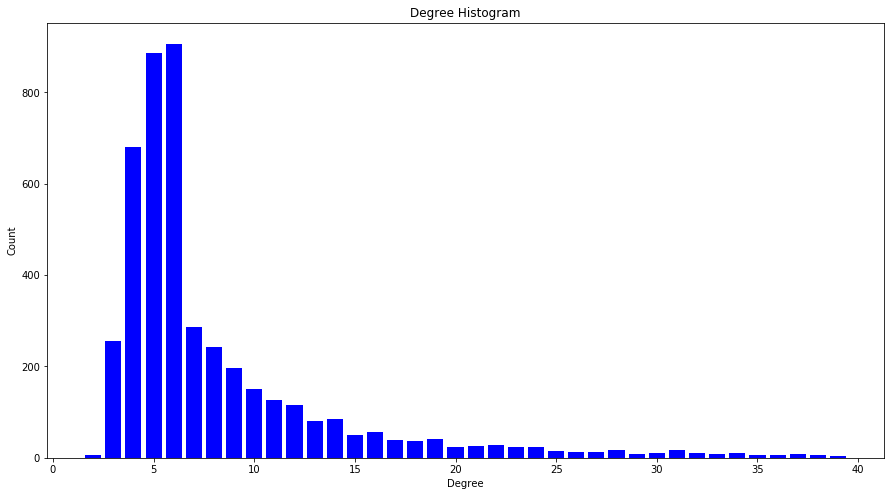

In [110]:
degree_sequence = sorted([d for n, d in network.degree() if d < 40], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(15,8))

plt.bar(deg, cnt, width=0.80, color='b')



plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")


plt.show()


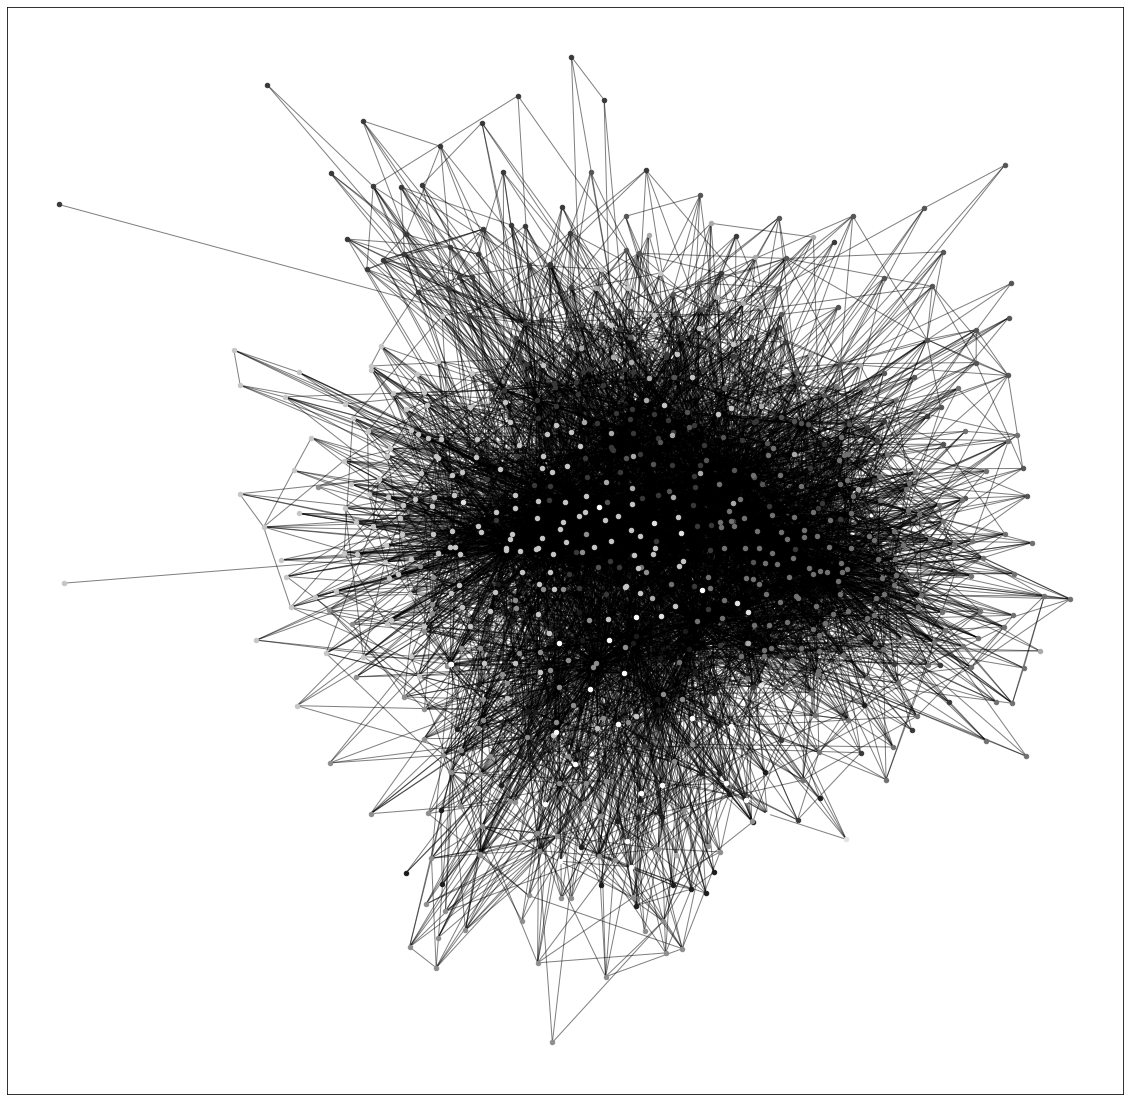

754


In [148]:
partition = community.best_partition(networkSmall)
plt.figure(figsize=(20,20))
#drawing
size1 = float(len(set(partition.values())))
pos1 = nx.spring_layout(networkSmall)
count1 = 0.
for com in set(partition.values()) :
    count1 = count1 + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(networkSmall, pos1, list_nodes, node_size = 20,
                                node_color = str(count1 / size1))


nx.draw_networkx_edges(networkSmall, pos1, alpha=0.5)
plt.show()


In [150]:
print(len(partition.values()))

754


In [152]:
for part in partition:
    print(part,",")

ios ,
swift ,
xcode ,
bash ,
git ,
macos ,
macos-catalina ,
c ,
python ,
linux ,
assembly ,
tensorflow ,
keras ,
objective-c ,
c++ ,
unique-ptr ,
abi ,
android ,
cordova ,
ionic-framework ,
ionic ,
build.gradle ,
list ,
tuples ,
ruby ,
floating-point ,
multithreading ,
javascript ,
google-chrome ,
cookies ,
visual-c++ ,
java ,
c# ,
.net ,
datetime ,
.net-core ,
string ,
while-loop ,
jvm ,
jit ,
haskell ,
functional-programming ,
recursion ,
mongodb ,
gcc ,
generics ,
lambda ,
type-inference ,
visual-studio-code ,
swiftui ,
pointers ,
undefined-behavior ,
pip ,
google-play ,
google-play-console ,
shell ,
stdstring ,
c++-standard-library ,
performance ,
language-lawyer ,
function-pointers ,
declaration ,
tabs ,
pandas ,
dataframe ,
dictionary ,
anaconda ,
conda ,
windows ,
jupyter-notebook ,
perl ,
compilation ,
python-requests ,
laravel ,
composer-php ,
java-stream ,
reflection ,
html ,
css ,
testing ,
pytest ,
ruby-on-rails ,
arrays ,
numpy ,
machine-learning ,
math ,
deep-learning ,
r

task-parallel-library ,
git-pull ,
google-cloud-messaging ,
onclick ,
uiview ,
architecture ,
angularjs-directive ,
angularjs-scope ,
docker-image ,
git-commit ,
git-reset ,
git-revert ,
csv ,
centos ,
branch ,
multidimensional-array ,
parameter-passing ,
web-services ,
git-config ,
git-tag ,
scripting ,
git-diff ,
base ,
android-marshmallow ,
keyboard ,
gruntjs ,
ecmascript-harmony ,
css-selectors ,
formatting ,
android-intent ,
sublimetext ,
react-jsx ,
html-table ,
uilabel ,
server ,
rails-activerecord ,
webkit ,
osx-elcapitan ,
custom-data-attribute ,
rename ,
ipython-notebook ,
ipad ,
text ,
newline ,
httprequest ,
command-line-arguments ,
msysgit ,
encoding ,
git-submodules ,
android-lollipop ,
cocoa-touch ,
whitespace ,
iis-express ,
orm ,
eloquent ,
setuptools ,
uri ,
character-encoding ,
filesystems ,
git-rebase ,
margin ,
timezone ,
count ,
uitextfield ,
android-listview ,
urllib ,
jackson ,
parameters ,
diff ,
layout ,
directory ,
makefile ,
annotations ,
angularjs-ng-repeat